In [1]:
# Import required libraries and dependencies

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.

market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data

market_data_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics

market_data_df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)


In [5]:
# Create a DataFrame with the scaled data

market_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Copy the crypto coin IDs from the original data

market_scaled_df["coin_id"] = market_data_df.index

# Set the coin_id column as index

market_scaled_df.set_index("coin_id", inplace=True)

# Display sample data
market_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values_scaled = list(range(1, 11))

# Create an empty list to store the inertia values

inertia_scaled = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

for k in k_values_scaled:

    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)

    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(market_scaled_df)

    # 3. Append the model.inertia_ to the inertia list
    inertia_scaled.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_scaled_data = {"Number of Clusters (k)": k_values_scaled, "Inertia": inertia_scaled}

# Create a DataFrame with the data to plot the Elbow curve

elbow_scaled_df = pd.DataFrame(elbow_scaled_data)

# Display the DataFrame

elbow_scaled_df


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,Number of Clusters (k),Inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


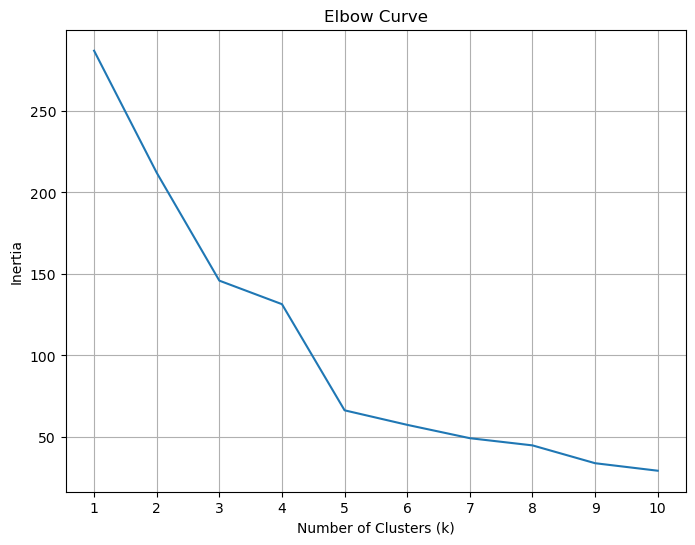

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(elbow_scaled_df['Number of Clusters (k)'], elbow_scaled_df['Inertia'], linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_scaled_df['Number of Clusters (k)'])
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  ***4*** with ***79.022435***

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k

k_model = KMeans(n_clusters=4)


In [9]:
# Fit the K-Means model using the scaled data

k_model.fit(market_scaled_df)


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data

market_prediction = k_model.predict(market_scaled_df)

# View the resulting array of cluster values.

market_prediction


array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame

market_scaled_predictions_df = market_scaled_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters

market_scaled_predictions_df["crypto_cluster"] = market_prediction

# Display sample data

market_scaled_predictions_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


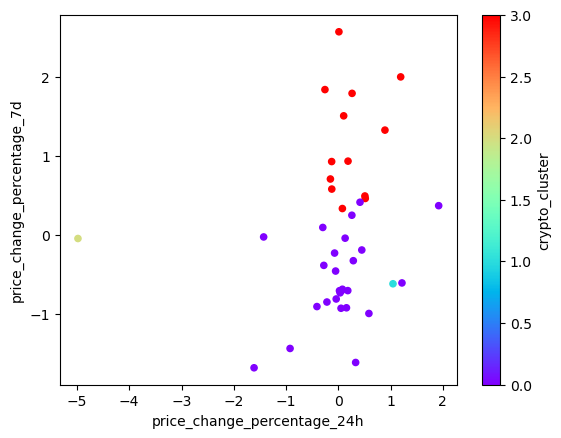

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

_ = market_scaled_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow",
)


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.

pca_model = PCA(n_components=3)


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame 
# to reduce to three principal components.

pcaData = pca_model.fit_transform(market_scaled_df)

# View the first five rows of the DataFrame. 

pcaData[0:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.

explained_variance_ratios =pca_model.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratios)


Explained Variance Ratios: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance of the three principal components is **0.89503166**


In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Copy the crypto names from the original data

pcaData2 = pd.DataFrame(pcaData)

# Rename the columns to PC1, 2, 3

pcaData2 = pcaData2.rename(columns={0: "PCA1", 1: "PCA2", 2: "PCA3"})

# Set the coinid column as index

pcaData2.index = market_scaled_df.index

# Display sample data

pcaData2.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

kVals = range(1, 11)

# Create an empty list to store the inertia values

intertiaVals = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

for k in kVals:

    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=1)
    
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pcaData)
    
    # 3. Append the model.inertia_ to the inertia list
    intertiaVals.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbowDict = {
    "Number of Clusters (k)": kVals,
    "Inertia": intertiaVals
}

# Create a DataFrame with the data to plot the Elbow curve

elbowData = pd.DataFrame(elbowDict)

# Display the DataFrame

elbowData


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,Number of Clusters (k),Inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


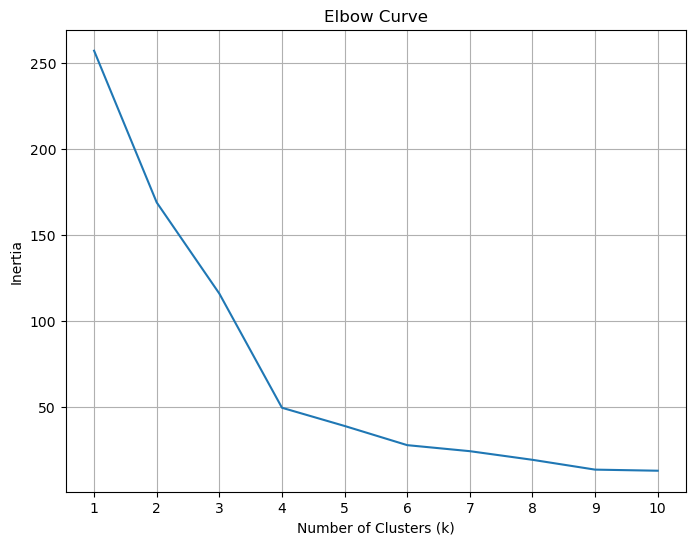

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(elbowData['Number of Clusters (k)'], elbowData['Inertia'], linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbowData['Number of Clusters (k)'])
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best value of 'k' using the PCA data. <br><br>

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It matches the best k found using the original data.
  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
# k_model_pca = KMeans(n_clusters=4)

model_pca = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [21]:
# Fit the K-Means model using the PCA data
# kmeans.fit(pcaData2)

model_pca.fit(pcaData2)


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# clusters = kmeans.predict(pcaData)

prediction2 = model_pca.predict(pcaData2)

# Print the resulting array of cluster values.
# clusters

prediction2


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [23]:
# Create a copy of the DataFrame with the PCA data

pca_copy = pcaData2.copy()

# Add a new column to the DataFrame with the predicted clusters

pca_copy['crypto_cluster']=prediction2

# Display sample data

pca_copy.head()


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

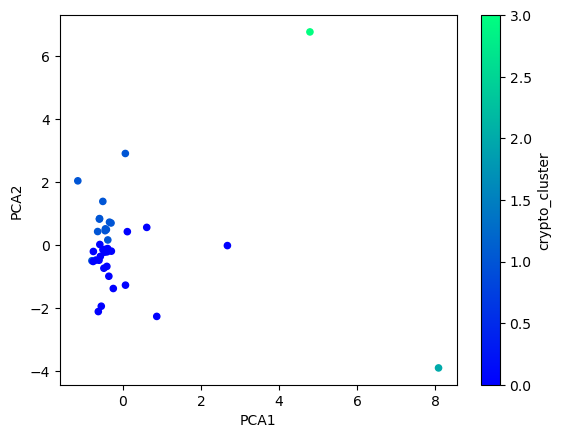

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

pca_copy.plot.scatter(
    x="PCA1",
    y="PCA2",
    c='crypto_cluster',
    colormap='winter'
)


### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.

principle_component=pca_model.components_
final_df = pd.DataFrame(principle_component.T,columns=['PCA1', 'PCA2', 'PCA3'],index=market_data_df.columns)
final_df


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** <br> Features with the strongest **positive** influence
  - For PCA1: the 200 day feature has the strongest influence, **0.594468**
  - For PCA2: the 30 day feature has the strongest influence, **0.562182**
  - For PCA3: the 7 day feature has the strongest influence, **0.787670**   
  <br> Features with the strongest **negative** influence
  - For PCA1: the 24 hour feature has the strongest influence, **-0.416728**
  - For PCA2: the 1 year feature has the strongest influence, **-0.150789**
  - For PCA3: the 60 day feature has the strongest influence, **-0.361377**    